## Imports

In [2]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk import word_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize
import re
from nltk.tokenize import RegexpTokenizer
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('Data/dreaddit-train.csv')
df_test = pd.read_csv('Data/dreaddit-test.csv')

In [4]:
wnl = WordNetLemmatizer()
def preprocessing(text):
    
    #step 2: tokenize
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    tokenized_doc = nltk.regexp_tokenize(text, pattern)
    
    
    #step x: lower all cases and tokenize
    low_tokenized_doc = [word.lower() for word in tokenized_doc]
    
    
    #step 4: stop words
    custom_stop_words = ['r', 'url', 'youi']
    stopwords_list = stopwords.words('english') + custom_stop_words
    stop_tokenized_doc = [word for word in low_tokenized_doc if word not in stopwords_list]
    
    #step 5: lem
    tokens = [wnl.lemmatize(word) for word in stop_tokenized_doc]
    
    return " ".join(tokens)
    #return tokens

In [5]:
custom_stop_words = ['r', 'url', 'youi']
stopwords_list = stopwords.words('english') + custom_stop_words
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [6]:
list_to_proc = df['text'].tolist()
text_list = []

for each_row in list_to_proc:
    text_list.append(preprocessing(each_row))

In [7]:
test_list_to_proc = df_test['text'].tolist()
test_text_list = []

for each_row in test_list_to_proc:
    test_text_list.append(preprocessing(each_row))

In [8]:
#save train text as a list to be preprocessed
text = [doc for doc in df['text']]

In [9]:
#save test text as a list to be preprocessed
test_text = [doc for doc in df_test['text']]

## Preprocess Data

In [10]:
#preprocessed train data
processed_text = [preprocessing(doc) for doc in text]

In [11]:
#preprocessed test data
test_processed_text = [preprocessing(doc) for doc in test_text]

In [12]:
processed_text

["said felt way suggeted go rest trigger ahead hypocondriac like decide look feeling doom hope maybe getting sucked rabbit hole ludicrous conspiracy stupid psychic test new age b something could even laugh road ended reading sense doom indicative various health ailment one prone top doom gloom f'n worried heart happen physical hour",
 "hey assistance sure right place post go i'm currently student intern sandia national lab working survey help improve marketing outreach effort many school recruit around country we're looking current undergrad grad stem student stem student know stem student would greatly appreciate help take pas along short survey thank everyone help take survey entered drawing chance win one three amazon gc",
 'mom hit newspaper shocked would know like play hitting smacking striking hitting violence sort person send vibe asking universe yesterday decided take friend go help another friend move new place driving friend moving strike shoulder address immediately th time 

In [13]:
#add processed text as a column 
df['processed_text'] = processed_text

In [14]:
#add processed text as a column 
df_test['processed_text'] = test_processed_text

## CountVectorizer

In [15]:
#countVectorizer- fit only on train data
count_vector = CountVectorizer()
count_vector.fit(df['processed_text'])

CountVectorizer()

In [16]:
#transform xtrain
X_train = count_vector.transform(df['processed_text'])

In [17]:
X_train = X_train.toarray()

In [18]:
#transform xtest
X_test = count_vector.transform(df_test['processed_text'])

In [19]:

X_test = X_test.toarray()

In [20]:
y_train = df['label']
y_test = df_test['label']

## Multinomial NB Model

In [21]:
#instantiate model and fit on train data
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [22]:
y_pred = clf.predict(X_test)

In [23]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[191, 155],
       [ 61, 308]])

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [25]:
#cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)

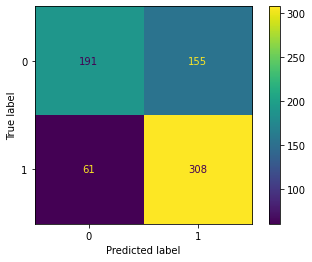

In [26]:
disp.plot()

plt.show()

In [27]:
#misclassified ypredicted
count_misclassified = (y_test != y_pred).sum()

In [28]:
count_misclassified

216

In [29]:
#training data score
clf.score(X_train, y_train)

0.9147286821705426

In [30]:
#test data score
clf.score(X_test, y_test)

0.6979020979020979

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.55      0.64       346
           1       0.67      0.83      0.74       369

    accuracy                           0.70       715
   macro avg       0.71      0.69      0.69       715
weighted avg       0.71      0.70      0.69       715



In [31]:
clf.coef_

array([[-10.441033  , -10.03556789, -11.13418018, ..., -10.441033  ,
        -11.13418018, -10.441033  ]])

In [32]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

mse = make_scorer(mean_squared_error)

cv_5_results = cross_val_score(clf, X_train, y_train, cv=5, scoring=mse)

In [33]:
cv_5_results

array([0.27816901, 0.25880282, 0.27816901, 0.2627866 , 0.2292769 ])

In [34]:
cv_results = cross_val_score(clf, X_train, y_train, cv=5)

In [35]:
cv_results

array([0.72183099, 0.74119718, 0.72183099, 0.7372134 , 0.7707231 ])

In [36]:
cv_test_results = cross_val_score(clf, X_test, y_test, cv=5)

In [37]:
cv_test_results

array([0.67832168, 0.68531469, 0.69230769, 0.6993007 , 0.65034965])

In [38]:
from sklearn.feature_extraction.text import CountVectorizer


print("Vocabulary : ",count_vector.vocabulary_)

Vocabulary :  {'said': 7527, 'felt': 3275, 'way': 9575, 'suggeted': 8492, 'go': 3756, 'rest': 7311, 'trigger': 9038, 'ahead': 226, 'hypocondriac': 4286, 'like': 5057, 'decide': 2152, 'look': 5146, 'feeling': 3268, 'doom': 2580, 'hope': 4176, 'maybe': 5335, 'getting': 3709, 'sucked': 8469, 'rabbit': 6881, 'hole': 4135, 'ludicrous': 5195, 'conspiracy': 1776, 'stupid': 8429, 'psychic': 6772, 'test': 8743, 'new': 5755, 'age': 198, 'something': 8077, 'could': 1899, 'even': 3016, 'laugh': 4947, 'road': 7421, 'ended': 2879, 'reading': 6977, 'sense': 7706, 'indicative': 4445, 'various': 9377, 'health': 4025, 'ailment': 229, 'one': 5948, 'prone': 6724, 'top': 8924, 'gloom': 3749, 'worried': 9778, 'heart': 4036, 'happen': 3964, 'physical': 6351, 'hour': 4219, 'hey': 4088, 'assistance': 536, 'sure': 8539, 'right': 7395, 'place': 6394, 'post': 6513, 'currently': 2055, 'student': 8414, 'intern': 4607, 'sandia': 7541, 'national': 5682, 'lab': 4893, 'working': 9771, 'survey': 8555, 'help': 4066, 'imp

In [39]:
print("features : ",count_vector.get_feature_names())

features :  ['aa', 'aaand', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abb', 'abd', 'abhorrent', 'ability', 'able', 'abortion', 'abound', 'abrasive', 'abridged', 'abroad', 'abruptly', 'absence', 'absent', 'absolute', 'absolutely', 'absolve', 'absorbed', 'absorbing', 'abstinence', 'abstract', 'absurd', 'abuse', 'abused', 'abuser', 'abusing', 'abusive', 'abut', 'abyss', 'ac', 'academic', 'academy', 'acap', 'accelerated', 'accent', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepting', 'accepts', 'access', 'accessory', 'accident', 'accidental', 'accidentally', 'accidentalsuicide', 'acclamation', 'accommodate', 'accommodation', 'accomodation', 'accompanied', 'accomplish', 'accomplishing', 'accomplishment', 'according', 'account', 'accountable', 'accurate', 'accurately', 'accusation', 'accusatory', 'accuse', 'accused', 'accuses', 'accusing', 'ace', 'achalasia', 'ache', 'achieve', 'achievement', 'achilles', 'acid', 'acidentaly', 'acknowledge', 'acknowledged', 'acknowledges

## Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
logreg = LogisticRegression(random_state=0)

In [42]:
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [43]:
predictions = logreg.predict(X_test)

In [44]:
#training score
logreg.score(X_train, y_train)

0.9950669485553206

In [45]:
#test score
logreg.score(X_test, y_test)

0.7048951048951049

In [46]:
count_misclassified = (y_test != predictions).sum()

In [47]:
count_misclassified

211

## Topic Model

In [48]:
from sklearn.decomposition import NMF

In [49]:
topic_model = NMF(n_components = 10)
topic_model.fit(X_train)

NMF(n_components=10)

In [50]:
W = topic_model.fit_transform(X_train)
H = topic_model.components_

In [51]:
for index,topic in enumerate(W):
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    print([count_vector.get_feature_names()[i] for i in topic.argsort()[-25:]])
    print('\n')

THE TOP 10 WORDS FOR TOPIC #0
['aa', 'abandonment', 'abandon', 'abhorrent', 'abandoned', 'ability', 'abandoning', 'abb', 'abd', 'aaand']


THE TOP 10 WORDS FOR TOPIC #1
['aa', 'aaand', 'abandonment', 'ability', 'abd', 'abhorrent', 'abandon', 'abandoning', 'abandoned', 'abb']


THE TOP 10 WORDS FOR TOPIC #2
['abb', 'abd', 'ability', 'abhorrent', 'abandonment', 'abandoned', 'aaand', 'abandoning', 'aa', 'abandon']


THE TOP 10 WORDS FOR TOPIC #3
['abandon', 'abandoned', 'abb', 'ability', 'abd', 'aa', 'abandoning', 'abandonment', 'abhorrent', 'aaand']


THE TOP 10 WORDS FOR TOPIC #4
['abandon', 'abhorrent', 'ability', 'abandoned', 'abandonment', 'abb', 'abandoning', 'aaand', 'abd', 'aa']


THE TOP 10 WORDS FOR TOPIC #5
['aaand', 'abandon', 'abandoned', 'abb', 'ability', 'abandonment', 'abd', 'aa', 'abandoning', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #6
['aaand', 'abandon', 'ability', 'abandoning', 'abb', 'abandoned', 'aa', 'abhorrent', 'abd', 'abandonment']


THE TOP 10 WORDS FOR TOPIC 

['aa', 'abandonment', 'abb', 'abandoned', 'abhorrent', 'abd', 'ability', 'aaand', 'abandoning', 'abandon']


THE TOP 10 WORDS FOR TOPIC #60
['aaand', 'abandon', 'abb', 'abhorrent', 'abandoning', 'ability', 'abandonment', 'aa', 'abd', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #61
['aaand', 'abandoning', 'abandonment', 'ability', 'abandoned', 'abandon', 'abhorrent', 'abb', 'aa', 'abd']


THE TOP 10 WORDS FOR TOPIC #62
['aa', 'abandoned', 'abd', 'abhorrent', 'abb', 'ability', 'abandon', 'abandonment', 'abandoning', 'aaand']


THE TOP 10 WORDS FOR TOPIC #63
['aaand', 'abandonment', 'abb', 'abhorrent', 'abandoning', 'abandoned', 'abandon', 'abd', 'aa', 'ability']


THE TOP 10 WORDS FOR TOPIC #64
['aa', 'abandonment', 'aaand', 'abd', 'abandoned', 'abb', 'abhorrent', 'ability', 'abandon', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #65
['aa', 'abandoned', 'abandonment', 'abhorrent', 'ability', 'aaand', 'abandoning', 'abb', 'abd', 'abandon']


THE TOP 10 WORDS FOR TOPIC #66
['aa', 'aaand', 'aba

['abandon', 'abandoned', 'abb', 'abd', 'aa', 'ability', 'abhorrent', 'abandoning', 'abandonment', 'aaand']


THE TOP 10 WORDS FOR TOPIC #122
['aa', 'abandoning', 'abandoned', 'ability', 'abandonment', 'abb', 'abd', 'aaand', 'abhorrent', 'abandon']


THE TOP 10 WORDS FOR TOPIC #123
['aa', 'abandoned', 'abandoning', 'abandonment', 'abb', 'abhorrent', 'aaand', 'abd', 'ability', 'abandon']


THE TOP 10 WORDS FOR TOPIC #124
['aaand', 'abandoned', 'abb', 'abd', 'abhorrent', 'abandonment', 'aa', 'ability', 'abandon', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #125
['aa', 'abandon', 'abandoned', 'abandonment', 'abd', 'abhorrent', 'ability', 'abb', 'aaand', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #126
['aaand', 'abandon', 'abandoning', 'abandonment', 'abb', 'ability', 'aa', 'abhorrent', 'abd', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #127
['aa', 'abandon', 'abandoned', 'abandonment', 'abb', 'ability', 'abandoning', 'abd', 'aaand', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #128
['abandoned',

['aaand', 'abandonment', 'abb', 'abhorrent', 'ability', 'aa', 'abd', 'abandoning', 'abandon', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #182
['abandoned', 'abhorrent', 'abb', 'aaand', 'aa', 'ability', 'abandon', 'abandonment', 'abandoning', 'abd']


THE TOP 10 WORDS FOR TOPIC #183
['abb', 'abd', 'abhorrent', 'abandon', 'abandoning', 'abandonment', 'abandoned', 'ability', 'aa', 'aaand']


THE TOP 10 WORDS FOR TOPIC #184
['aaand', 'abandoned', 'abb', 'abhorrent', 'abandoning', 'abd', 'abandonment', 'aa', 'abandon', 'ability']


THE TOP 10 WORDS FOR TOPIC #185
['abandoned', 'abhorrent', 'abandoning', 'aaand', 'abb', 'aa', 'abandon', 'abd', 'ability', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #186
['abandoning', 'abandonment', 'abb', 'abandon', 'abd', 'ability', 'abhorrent', 'aa', 'abandoned', 'aaand']


THE TOP 10 WORDS FOR TOPIC #187
['abandon', 'aaand', 'abandoning', 'abandoned', 'abhorrent', 'abd', 'aa', 'abb', 'ability', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #188
['aa', 'aaand

['abandon', 'abandoned', 'abandoning', 'abandonment', 'abb', 'aa', 'abhorrent', 'ability', 'abd', 'aaand']


THE TOP 10 WORDS FOR TOPIC #243
['abandon', 'abb', 'abandonment', 'abandoned', 'aa', 'abandoning', 'abd', 'aaand', 'abhorrent', 'ability']


THE TOP 10 WORDS FOR TOPIC #244
['abandonment', 'abb', 'abd', 'ability', 'abandoning', 'abandoned', 'aa', 'abandon', 'aaand', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #245
['aa', 'abd', 'abhorrent', 'abandoned', 'ability', 'abandoning', 'abb', 'abandon', 'aaand', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #246
['abandoning', 'abb', 'abhorrent', 'abandon', 'abandoned', 'ability', 'aa', 'aaand', 'abd', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #247
['aaand', 'abandoned', 'abandoning', 'abandonment', 'abd', 'abhorrent', 'abandon', 'ability', 'aa', 'abb']


THE TOP 10 WORDS FOR TOPIC #248
['abandoned', 'abandoning', 'abandonment', 'ability', 'aa', 'abhorrent', 'abandon', 'abb', 'abd', 'aaand']


THE TOP 10 WORDS FOR TOPIC #249
['aa', 'aaand

['aaand', 'abandonment', 'abb', 'abhorrent', 'aa', 'abandon', 'abandoning', 'ability', 'abd', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #303
['aa', 'abandoned', 'abandoning', 'ability', 'aaand', 'abb', 'abandonment', 'abandon', 'abhorrent', 'abd']


THE TOP 10 WORDS FOR TOPIC #304
['aaand', 'abandoned', 'abandoning', 'abb', 'abhorrent', 'ability', 'abandonment', 'aa', 'abd', 'abandon']


THE TOP 10 WORDS FOR TOPIC #305
['aa', 'aaand', 'abandonment', 'abd', 'ability', 'abhorrent', 'abandoning', 'abandon', 'abandoned', 'abb']


THE TOP 10 WORDS FOR TOPIC #306
['aa', 'abb', 'aaand', 'abandonment', 'abandon', 'abhorrent', 'abandoned', 'abandoning', 'abd', 'ability']


THE TOP 10 WORDS FOR TOPIC #307
['abandon', 'abandoned', 'abandonment', 'abd', 'abb', 'aa', 'abandoning', 'ability', 'aaand', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #308
['aaand', 'abandonment', 'abhorrent', 'abandoned', 'abd', 'aa', 'abandoning', 'abandon', 'ability', 'abb']


THE TOP 10 WORDS FOR TOPIC #309
['abandoning'

['abb', 'abhorrent', 'aa', 'abandoning', 'aaand', 'abandonment', 'abd', 'abandoned', 'ability', 'abandon']


THE TOP 10 WORDS FOR TOPIC #363
['aaand', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abb', 'abhorrent', 'aa', 'ability', 'abd']


THE TOP 10 WORDS FOR TOPIC #364
['abandon', 'abandoned', 'abandoning', 'abb', 'abhorrent', 'aa', 'abandonment', 'aaand', 'abd', 'ability']


THE TOP 10 WORDS FOR TOPIC #365
['aaand', 'abandon', 'abandoned', 'abandoning', 'abhorrent', 'abandonment', 'ability', 'abd', 'abb', 'aa']


THE TOP 10 WORDS FOR TOPIC #366
['aa', 'abb', 'abandon', 'abandoned', 'abandonment', 'abandoning', 'ability', 'aaand', 'abd', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #367
['aaand', 'abandon', 'abandoning', 'aa', 'abandonment', 'ability', 'abhorrent', 'abandoned', 'abb', 'abd']


THE TOP 10 WORDS FOR TOPIC #368
['aa', 'abb', 'abandon', 'abd', 'ability', 'abandoning', 'abandoned', 'abandonment', 'abhorrent', 'aaand']


THE TOP 10 WORDS FOR TOPIC #369
['aaand', 'ab

['aaand', 'abb', 'ability', 'aa', 'abhorrent', 'abd', 'abandonment', 'abandoned', 'abandon', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #425
['aa', 'abandon', 'abandoned', 'abandonment', 'ability', 'aaand', 'abb', 'abhorrent', 'abd', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #426
['aaand', 'abandonment', 'abhorrent', 'abandon', 'abb', 'abandoning', 'abandoned', 'aa', 'ability', 'abd']


THE TOP 10 WORDS FOR TOPIC #427
['aaand', 'abb', 'aa', 'abd', 'abandonment', 'ability', 'abandoning', 'abandoned', 'abhorrent', 'abandon']


THE TOP 10 WORDS FOR TOPIC #428
['aa', 'abandoned', 'abandonment', 'abd', 'abhorrent', 'ability', 'abb', 'abandoning', 'aaand', 'abandon']


THE TOP 10 WORDS FOR TOPIC #429
['abandon', 'abb', 'aa', 'abd', 'abandonment', 'abandoning', 'abhorrent', 'aaand', 'ability', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #430
['aa', 'aaand', 'abandonment', 'abb', 'abhorrent', 'ability', 'abandoned', 'abd', 'abandoning', 'abandon']


THE TOP 10 WORDS FOR TOPIC #431
['aa', 'aaand

['aaand', 'abandon', 'abb', 'abd', 'ability', 'abandonment', 'abhorrent', 'abandoned', 'abandoning', 'aa']


THE TOP 10 WORDS FOR TOPIC #486
['aa', 'aaand', 'abandoned', 'abandoning', 'abb', 'abhorrent', 'ability', 'abd', 'abandonment', 'abandon']


THE TOP 10 WORDS FOR TOPIC #487
['abandon', 'abandoned', 'abd', 'abhorrent', 'ability', 'abb', 'abandonment', 'abandoning', 'aa', 'aaand']


THE TOP 10 WORDS FOR TOPIC #488
['aaand', 'abandoned', 'abandoning', 'abandon', 'abandonment', 'abhorrent', 'ability', 'abb', 'aa', 'abd']


THE TOP 10 WORDS FOR TOPIC #489
['abhorrent', 'abandonment', 'abandon', 'aa', 'abd', 'ability', 'abb', 'aaand', 'abandoned', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #490
['abandoned', 'abandonment', 'abb', 'ability', 'abandoning', 'aaand', 'abd', 'abandon', 'abhorrent', 'aa']


THE TOP 10 WORDS FOR TOPIC #491
['aa', 'aaand', 'abandon', 'abandoned', 'abandoning', 'abb', 'abhorrent', 'abandonment', 'ability', 'abd']


THE TOP 10 WORDS FOR TOPIC #492
['aa', 'aaand

['aaand', 'abandon', 'abandoning', 'abb', 'abhorrent', 'abandoned', 'abandonment', 'abd', 'aa', 'ability']


THE TOP 10 WORDS FOR TOPIC #547
['abandonment', 'aa', 'ability', 'abb', 'abandoned', 'abandoning', 'abd', 'abhorrent', 'abandon', 'aaand']


THE TOP 10 WORDS FOR TOPIC #548
['aa', 'abandoned', 'abandonment', 'abb', 'abandoning', 'abd', 'abhorrent', 'ability', 'abandon', 'aaand']


THE TOP 10 WORDS FOR TOPIC #549
['aa', 'abandoning', 'abandonment', 'abandoned', 'aaand', 'ability', 'abhorrent', 'abb', 'abd', 'abandon']


THE TOP 10 WORDS FOR TOPIC #550
['aa', 'abandoning', 'abb', 'abandonment', 'abandon', 'abandoned', 'abhorrent', 'abd', 'aaand', 'ability']


THE TOP 10 WORDS FOR TOPIC #551
['abandoned', 'abandonment', 'abandoning', 'abandon', 'aa', 'abb', 'abd', 'aaand', 'abhorrent', 'ability']


THE TOP 10 WORDS FOR TOPIC #552
['aa', 'abb', 'abhorrent', 'abandon', 'abandonment', 'abandoning', 'abandoned', 'aaand', 'abd', 'ability']


THE TOP 10 WORDS FOR TOPIC #553
['aa', 'aaand

['aa', 'abandonment', 'abb', 'abd', 'aaand', 'ability', 'abandoned', 'abandoning', 'abandon', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #609
['aa', 'aaand', 'abandoning', 'abandonment', 'abb', 'abhorrent', 'ability', 'abandoned', 'abd', 'abandon']


THE TOP 10 WORDS FOR TOPIC #610
['abandon', 'abandoning', 'abandoned', 'abb', 'aaand', 'abd', 'aa', 'abandonment', 'abhorrent', 'ability']


THE TOP 10 WORDS FOR TOPIC #611
['aa', 'abandon', 'abandonment', 'abandoning', 'aaand', 'abd', 'abhorrent', 'abb', 'ability', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #612
['aa', 'aaand', 'abandoned', 'abandonment', 'abb', 'abd', 'ability', 'abandon', 'abandoning', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #613
['aaand', 'abb', 'abhorrent', 'abandonment', 'abandoning', 'aa', 'ability', 'abd', 'abandon', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #614
['abhorrent', 'abandonment', 'aa', 'abd', 'abandoned', 'abandoning', 'abb', 'ability', 'aaand', 'abandon']


THE TOP 10 WORDS FOR TOPIC #615
['aaand', 'ab

['aa', 'aaand', 'abandon', 'abandoning', 'abandonment', 'abb', 'ability', 'abhorrent', 'abandoned', 'abd']


THE TOP 10 WORDS FOR TOPIC #672
['abandoned', 'abandonment', 'aaand', 'abd', 'abb', 'aa', 'abandon', 'abandoning', 'ability', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #673
['aaand', 'aa', 'abandoned', 'abandoning', 'abb', 'ability', 'abandon', 'abhorrent', 'abd', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #674
['abandonment', 'abd', 'aa', 'abandon', 'abb', 'abandoned', 'abhorrent', 'aaand', 'ability', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #675
['aa', 'aaand', 'abd', 'abhorrent', 'abb', 'abandoning', 'abandon', 'abandoned', 'ability', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #676
['abandoned', 'abd', 'abhorrent', 'abb', 'aa', 'ability', 'abandonment', 'abandoning', 'abandon', 'aaand']


THE TOP 10 WORDS FOR TOPIC #677
['aa', 'aaand', 'abandon', 'abandoning', 'abb', 'abd', 'ability', 'abandoned', 'abandonment', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #678
['abandoned',

['aaand', 'abandon', 'abandoning', 'abandonment', 'ability', 'aa', 'abhorrent', 'abb', 'abd', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #733
['abandonment', 'abb', 'aaand', 'abhorrent', 'abandoning', 'abandon', 'abandoned', 'aa', 'abd', 'ability']


THE TOP 10 WORDS FOR TOPIC #734
['abandonment', 'aaand', 'abb', 'ability', 'aa', 'abandoned', 'abd', 'abandoning', 'abandon', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #735
['abandon', 'abandoned', 'abandonment', 'abb', 'abhorrent', 'aaand', 'abandoning', 'abd', 'ability', 'aa']


THE TOP 10 WORDS FOR TOPIC #736
['aaand', 'abandon', 'abb', 'abhorrent', 'ability', 'abandoned', 'aa', 'abd', 'abandonment', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #737
['abandoning', 'abb', 'abandonment', 'abandoned', 'aaand', 'abd', 'aa', 'ability', 'abhorrent', 'abandon']


THE TOP 10 WORDS FOR TOPIC #738
['aa', 'abandonment', 'abb', 'abd', 'abhorrent', 'abandoning', 'abandoned', 'abandon', 'aaand', 'ability']


THE TOP 10 WORDS FOR TOPIC #739
['abandon', '

['aaand', 'abandonment', 'aa', 'abandon', 'abhorrent', 'ability', 'abandoned', 'abd', 'abb', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #795
['aa', 'abandoned', 'abandoning', 'abhorrent', 'abandonment', 'abandon', 'abb', 'abd', 'aaand', 'ability']


THE TOP 10 WORDS FOR TOPIC #796
['abandoned', 'abandonment', 'abb', 'abandon', 'aa', 'abd', 'aaand', 'ability', 'abhorrent', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #797
['aa', 'abandon', 'abandoned', 'abandoning', 'abb', 'ability', 'abhorrent', 'abandonment', 'aaand', 'abd']


THE TOP 10 WORDS FOR TOPIC #798
['aa', 'aaand', 'abandon', 'abandoning', 'abandonment', 'abb', 'abhorrent', 'abd', 'abandoned', 'ability']


THE TOP 10 WORDS FOR TOPIC #799
['abandoned', 'abandonment', 'abb', 'abhorrent', 'aa', 'abandoning', 'aaand', 'abd', 'abandon', 'ability']


THE TOP 10 WORDS FOR TOPIC #800
['abandon', 'abb', 'ability', 'abandoned', 'abandoning', 'aa', 'aaand', 'abhorrent', 'abd', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #801
['abandon', '

['aa', 'abandon', 'abandoning', 'abandonment', 'abd', 'abhorrent', 'abandoned', 'abb', 'aaand', 'ability']


THE TOP 10 WORDS FOR TOPIC #856
['aa', 'abandoning', 'abb', 'abd', 'abhorrent', 'abandon', 'abandoned', 'ability', 'abandonment', 'aaand']


THE TOP 10 WORDS FOR TOPIC #857
['abandon', 'abandoning', 'abhorrent', 'abandonment', 'abd', 'abb', 'aaand', 'ability', 'abandoned', 'aa']


THE TOP 10 WORDS FOR TOPIC #858
['aaand', 'abd', 'abandon', 'abandoning', 'abhorrent', 'abb', 'aa', 'ability', 'abandoned', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #859
['aaand', 'abandon', 'abb', 'abhorrent', 'aa', 'abandoning', 'abandoned', 'abd', 'abandonment', 'ability']


THE TOP 10 WORDS FOR TOPIC #860
['abandon', 'abb', 'abandonment', 'abandoning', 'aa', 'ability', 'abandoned', 'abhorrent', 'abd', 'aaand']


THE TOP 10 WORDS FOR TOPIC #861
['aaand', 'abandon', 'abandoning', 'abd', 'aa', 'abb', 'abandonment', 'ability', 'abhorrent', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #862
['abandoned',

['aa', 'abandonment', 'abd', 'aaand', 'abhorrent', 'abandoned', 'ability', 'abandoning', 'abandon', 'abb']


THE TOP 10 WORDS FOR TOPIC #918
['abb', 'aaand', 'ability', 'abandon', 'abandoning', 'aa', 'abhorrent', 'abd', 'abandonment', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #919
['abandoning', 'abandon', 'abhorrent', 'abd', 'abandoned', 'aa', 'ability', 'abb', 'abandonment', 'aaand']


THE TOP 10 WORDS FOR TOPIC #920
['abandon', 'abandonment', 'abb', 'abhorrent', 'aa', 'abd', 'abandoning', 'aaand', 'abandoned', 'ability']


THE TOP 10 WORDS FOR TOPIC #921
['abb', 'ability', 'abhorrent', 'abandon', 'abandoned', 'abandonment', 'aaand', 'aa', 'abandoning', 'abd']


THE TOP 10 WORDS FOR TOPIC #922
['abandoned', 'abandonment', 'abb', 'abhorrent', 'aa', 'ability', 'abd', 'abandoning', 'abandon', 'aaand']


THE TOP 10 WORDS FOR TOPIC #923
['abb', 'abhorrent', 'abandoning', 'abd', 'aa', 'abandon', 'ability', 'abandonment', 'abandoned', 'aaand']


THE TOP 10 WORDS FOR TOPIC #924
['abandonment

['aaand', 'abandon', 'abandoned', 'abandonment', 'abb', 'ability', 'abd', 'abandoning', 'aa', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #980
['abandoning', 'abandonment', 'aa', 'abhorrent', 'abd', 'aaand', 'abb', 'abandoned', 'abandon', 'ability']


THE TOP 10 WORDS FOR TOPIC #981
['abandonment', 'aaand', 'aa', 'abandoned', 'abb', 'abhorrent', 'abandoning', 'abandon', 'abd', 'ability']


THE TOP 10 WORDS FOR TOPIC #982
['abandonment', 'abhorrent', 'abandoned', 'aaand', 'aa', 'abandon', 'abandoning', 'abb', 'abd', 'ability']


THE TOP 10 WORDS FOR TOPIC #983
['aa', 'aaand', 'abandon', 'abandoning', 'abb', 'abhorrent', 'ability', 'abd', 'abandonment', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #984
['aaand', 'abandoned', 'abandonment', 'abb', 'abhorrent', 'ability', 'abandon', 'abd', 'abandoning', 'aa']


THE TOP 10 WORDS FOR TOPIC #985
['aa', 'abandon', 'abandoning', 'abd', 'ability', 'abandonment', 'abb', 'abhorrent', 'aaand', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #986
['abandoned',

['aaand', 'abhorrent', 'abandonment', 'aa', 'abandon', 'abd', 'ability', 'abandoning', 'abb', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #1043
['aa', 'abb', 'abandonment', 'abd', 'abandon', 'abhorrent', 'abandoned', 'ability', 'abandoning', 'aaand']


THE TOP 10 WORDS FOR TOPIC #1044
['abandoned', 'abandoning', 'abandonment', 'abhorrent', 'abandon', 'aaand', 'aa', 'abb', 'abd', 'ability']


THE TOP 10 WORDS FOR TOPIC #1045
['abandonment', 'aa', 'aaand', 'abandoning', 'abandoned', 'abd', 'abb', 'ability', 'abandon', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #1046
['aaand', 'abandon', 'ability', 'abandoned', 'abandoning', 'abandonment', 'abb', 'abhorrent', 'aa', 'abd']


THE TOP 10 WORDS FOR TOPIC #1047
['aa', 'abandoned', 'abandonment', 'abb', 'aaand', 'abhorrent', 'abandoning', 'ability', 'abandon', 'abd']


THE TOP 10 WORDS FOR TOPIC #1048
['abb', 'abandon', 'aa', 'abandoning', 'abandoned', 'abhorrent', 'aaand', 'abd', 'ability', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #1049
['aaan

['aaand', 'abandon', 'abandoned', 'abandonment', 'abb', 'ability', 'abandoning', 'abd', 'aa', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #1106
['abhorrent', 'abandoning', 'aa', 'abandoned', 'ability', 'abb', 'abandon', 'abd', 'aaand', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #1107
['abandoned', 'abandoning', 'abb', 'aa', 'aaand', 'abandonment', 'abhorrent', 'ability', 'abd', 'abandon']


THE TOP 10 WORDS FOR TOPIC #1108
['abandoning', 'abb', 'abhorrent', 'ability', 'abandonment', 'aaand', 'abandoned', 'aa', 'abd', 'abandon']


THE TOP 10 WORDS FOR TOPIC #1109
['aaand', 'abb', 'abhorrent', 'abandoning', 'aa', 'abandonment', 'abandoned', 'ability', 'abandon', 'abd']


THE TOP 10 WORDS FOR TOPIC #1110
['aa', 'abandoned', 'abandoning', 'abb', 'abhorrent', 'ability', 'abd', 'abandonment', 'abandon', 'aaand']


THE TOP 10 WORDS FOR TOPIC #1111
['aaand', 'abhorrent', 'ability', 'abb', 'abandoning', 'aa', 'abandon', 'abandoned', 'abd', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #1112
['aa',

['aa', 'aaand', 'abb', 'abhorrent', 'abd', 'ability', 'abandon', 'abandonment', 'abandoned', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1168
['abandon', 'abb', 'ability', 'aa', 'abandonment', 'abd', 'abhorrent', 'aaand', 'abandoned', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1169
['abandon', 'abandonment', 'abhorrent', 'aa', 'aaand', 'abd', 'abandoned', 'abandoning', 'ability', 'abb']


THE TOP 10 WORDS FOR TOPIC #1170
['aa', 'abandoned', 'abb', 'abhorrent', 'aaand', 'ability', 'abandonment', 'abandoning', 'abd', 'abandon']


THE TOP 10 WORDS FOR TOPIC #1171
['abandoned', 'aa', 'abhorrent', 'abb', 'abd', 'aaand', 'abandon', 'abandoning', 'ability', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #1172
['abb', 'abd', 'abhorrent', 'abandonment', 'abandoned', 'aa', 'ability', 'aaand', 'abandoning', 'abandon']


THE TOP 10 WORDS FOR TOPIC #1173
['abandon', 'abandoned', 'abandoning', 'abhorrent', 'aa', 'aaand', 'abb', 'abd', 'ability', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #1174
['aaan

['aa', 'abandon', 'abandoning', 'abandonment', 'abd', 'abhorrent', 'ability', 'aaand', 'abandoned', 'abb']


THE TOP 10 WORDS FOR TOPIC #1229
['aaand', 'abb', 'abhorrent', 'abandoned', 'abandon', 'aa', 'abandonment', 'ability', 'abd', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1230
['abandon', 'abandoning', 'abb', 'abhorrent', 'abandonment', 'aa', 'aaand', 'abandoned', 'abd', 'ability']


THE TOP 10 WORDS FOR TOPIC #1231
['abd', 'abandoned', 'abb', 'abandon', 'abandonment', 'aaand', 'aa', 'ability', 'abhorrent', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1232
['aa', 'abandoning', 'abb', 'abandonment', 'abandon', 'aaand', 'abd', 'abhorrent', 'abandoned', 'ability']


THE TOP 10 WORDS FOR TOPIC #1233
['abandonment', 'abb', 'abd', 'aa', 'ability', 'abandoned', 'abandoning', 'abandon', 'abhorrent', 'aaand']


THE TOP 10 WORDS FOR TOPIC #1234
['abb', 'abhorrent', 'abandon', 'abandoning', 'abandonment', 'aa', 'abd', 'aaand', 'ability', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #1235
['aa',

['aaand', 'abandon', 'abandoned', 'abandonment', 'abb', 'abhorrent', 'ability', 'abd', 'aa', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1291
['abandon', 'abb', 'abandoning', 'ability', 'abhorrent', 'abandonment', 'abandoned', 'abd', 'aaand', 'aa']


THE TOP 10 WORDS FOR TOPIC #1292
['aa', 'abandon', 'abandoning', 'abandonment', 'abb', 'abd', 'abhorrent', 'ability', 'aaand', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #1293
['aa', 'abandoned', 'abb', 'ability', 'abandonment', 'aaand', 'abhorrent', 'abandoning', 'abd', 'abandon']


THE TOP 10 WORDS FOR TOPIC #1294
['aa', 'abandoned', 'abandoning', 'abb', 'abhorrent', 'abandonment', 'aaand', 'abd', 'abandon', 'ability']


THE TOP 10 WORDS FOR TOPIC #1295
['aa', 'abandon', 'abandoning', 'abandonment', 'abd', 'abhorrent', 'ability', 'abb', 'abandoned', 'aaand']


THE TOP 10 WORDS FOR TOPIC #1296
['abandon', 'abandonment', 'aaand', 'abandoning', 'abandoned', 'aa', 'abhorrent', 'ability', 'abd', 'abb']


THE TOP 10 WORDS FOR TOPIC #1297
['aban

['aaand', 'abandoning', 'abb', 'abhorrent', 'ability', 'abandon', 'abandoned', 'aa', 'abd', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #1409
['aa', 'abandoned', 'abandonment', 'abb', 'abd', 'aaand', 'abandon', 'abhorrent', 'ability', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1410
['aaand', 'abandon', 'abandoning', 'abandonment', 'abb', 'ability', 'aa', 'abhorrent', 'abandoned', 'abd']


THE TOP 10 WORDS FOR TOPIC #1411
['abandonment', 'abb', 'ability', 'abandon', 'abhorrent', 'aaand', 'abd', 'abandoning', 'abandoned', 'aa']


THE TOP 10 WORDS FOR TOPIC #1412
['abandon', 'abandonment', 'abandoning', 'aa', 'abhorrent', 'ability', 'abb', 'abd', 'abandoned', 'aaand']


THE TOP 10 WORDS FOR TOPIC #1413
['aa', 'abandon', 'abandoning', 'abb', 'abhorrent', 'abd', 'abandoned', 'abandonment', 'ability', 'aaand']


THE TOP 10 WORDS FOR TOPIC #1414
['aa', 'aaand', 'abandon', 'abandoning', 'abhorrent', 'abd', 'abandonment', 'abb', 'ability', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #1415
['aaan

['aaand', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abb', 'abd', 'abhorrent', 'ability', 'aa']


THE TOP 10 WORDS FOR TOPIC #1470
['aa', 'abandonment', 'abb', 'abd', 'ability', 'abandoning', 'abhorrent', 'abandoned', 'aaand', 'abandon']


THE TOP 10 WORDS FOR TOPIC #1471
['abandoned', 'ability', 'abandoning', 'abb', 'abd', 'abandon', 'aaand', 'abhorrent', 'abandonment', 'aa']


THE TOP 10 WORDS FOR TOPIC #1472
['aa', 'abandoning', 'abb', 'abhorrent', 'ability', 'abandon', 'abandonment', 'abandoned', 'abd', 'aaand']


THE TOP 10 WORDS FOR TOPIC #1473
['abandon', 'abandoned', 'abb', 'abandoning', 'abandonment', 'aaand', 'abhorrent', 'abd', 'aa', 'ability']


THE TOP 10 WORDS FOR TOPIC #1474
['abandoned', 'abb', 'abandonment', 'abd', 'abhorrent', 'abandon', 'ability', 'aa', 'abandoning', 'aaand']


THE TOP 10 WORDS FOR TOPIC #1475
['aaand', 'abandonment', 'abhorrent', 'abandoned', 'abb', 'abandon', 'aa', 'ability', 'abd', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1476
['abho

['abandon', 'abb', 'aaand', 'abandonment', 'aa', 'abandoning', 'abhorrent', 'ability', 'abd', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #1533
['abandon', 'abb', 'abhorrent', 'abandonment', 'aa', 'abandoned', 'abandoning', 'ability', 'abd', 'aaand']


THE TOP 10 WORDS FOR TOPIC #1534
['abandoned', 'abandoning', 'abhorrent', 'ability', 'aaand', 'abandon', 'abandonment', 'abb', 'aa', 'abd']


THE TOP 10 WORDS FOR TOPIC #1535
['abandon', 'abb', 'abandonment', 'aaand', 'abd', 'abhorrent', 'ability', 'aa', 'abandoning', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #1536
['aaand', 'abandon', 'abandoned', 'ability', 'abandonment', 'abb', 'abd', 'aa', 'abandoning', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #1537
['aa', 'aaand', 'abandoned', 'abandoning', 'abandonment', 'abhorrent', 'ability', 'abd', 'abb', 'abandon']


THE TOP 10 WORDS FOR TOPIC #1538
['abb', 'abd', 'abhorrent', 'aa', 'ability', 'aaand', 'abandoned', 'abandon', 'abandoning', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #1539
['aa',

['aaand', 'abandoning', 'abd', 'abhorrent', 'abandonment', 'aa', 'ability', 'abandon', 'abb', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #1593
['aaand', 'abandon', 'abandoned', 'abandonment', 'abb', 'abandoning', 'aa', 'abd', 'ability', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #1594
['aa', 'abandoned', 'abandoning', 'abandonment', 'abd', 'abhorrent', 'abb', 'aaand', 'abandon', 'ability']


THE TOP 10 WORDS FOR TOPIC #1595
['aa', 'abandoned', 'abandonment', 'ability', 'aaand', 'abandon', 'abb', 'abd', 'abhorrent', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1596
['aa', 'abb', 'abandonment', 'abandon', 'abandoned', 'abandoning', 'abhorrent', 'aaand', 'ability', 'abd']


THE TOP 10 WORDS FOR TOPIC #1597
['aaand', 'abandon', 'abhorrent', 'abb', 'abd', 'aa', 'abandonment', 'abandoned', 'ability', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1598
['aaand', 'abandon', 'abandonment', 'abb', 'abhorrent', 'ability', 'abandoned', 'abd', 'aa', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1599
['aban

['abandon', 'abb', 'abhorrent', 'ability', 'abandonment', 'abandoning', 'abandoned', 'abd', 'aaand', 'aa']


THE TOP 10 WORDS FOR TOPIC #1656
['aa', 'aaand', 'abandoning', 'abandonment', 'abd', 'abandon', 'ability', 'abandoned', 'abb', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #1657
['abandon', 'abandonment', 'abd', 'abandoning', 'aa', 'abb', 'ability', 'aaand', 'abandoned', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #1658
['aa', 'aaand', 'abandonment', 'abb', 'abandon', 'abandoned', 'abd', 'ability', 'abandoning', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #1659
['aa', 'aaand', 'abandoning', 'abb', 'ability', 'abandoned', 'abd', 'abandon', 'abandonment', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #1660
['aa', 'aaand', 'abandoned', 'abandoning', 'abandonment', 'abb', 'abd', 'ability', 'abhorrent', 'abandon']


THE TOP 10 WORDS FOR TOPIC #1661
['aaand', 'abd', 'ability', 'abandonment', 'abandon', 'abhorrent', 'abandoned', 'abandoning', 'abb', 'aa']


THE TOP 10 WORDS FOR TOPIC #1662
['aaan

['abandon', 'abb', 'abandoning', 'abandonment', 'aa', 'aaand', 'abandoned', 'ability', 'abhorrent', 'abd']


THE TOP 10 WORDS FOR TOPIC #1720
['aa', 'aaand', 'abandon', 'abandoned', 'abandonment', 'abb', 'abhorrent', 'abd', 'ability', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1721
['abandon', 'abandoned', 'abd', 'abhorrent', 'abandonment', 'aa', 'abb', 'ability', 'aaand', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1722
['abb', 'abd', 'abhorrent', 'abandoned', 'abandonment', 'ability', 'aa', 'aaand', 'abandon', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1723
['abandon', 'abandoning', 'abb', 'abandonment', 'aa', 'abandoned', 'ability', 'abhorrent', 'abd', 'aaand']


THE TOP 10 WORDS FOR TOPIC #1724
['abandoned', 'abandon', 'abd', 'aa', 'abb', 'abandoning', 'ability', 'abandonment', 'abhorrent', 'aaand']


THE TOP 10 WORDS FOR TOPIC #1725
['abandonment', 'abb', 'aa', 'abd', 'ability', 'aaand', 'abandoned', 'abandon', 'abhorrent', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1726
['aa',

['aa', 'abandoning', 'abandonment', 'abhorrent', 'abb', 'abandon', 'ability', 'abandoned', 'abd', 'aaand']


THE TOP 10 WORDS FOR TOPIC #1784
['aa', 'aaand', 'abandoned', 'abandonment', 'abb', 'abhorrent', 'abd', 'ability', 'abandoning', 'abandon']


THE TOP 10 WORDS FOR TOPIC #1785
['aa', 'abb', 'abhorrent', 'aaand', 'ability', 'abandoned', 'abandon', 'abd', 'abandoning', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #1786
['aa', 'abandon', 'abb', 'abandonment', 'abd', 'abandoning', 'abhorrent', 'ability', 'aaand', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #1787
['abb', 'abandoned', 'abandonment', 'abandon', 'abandoning', 'abd', 'aa', 'abhorrent', 'ability', 'aaand']


THE TOP 10 WORDS FOR TOPIC #1788
['aa', 'abandonment', 'abandon', 'abandoned', 'abd', 'abandoning', 'ability', 'abb', 'aaand', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #1789
['aaand', 'abb', 'abandonment', 'abhorrent', 'abandoning', 'ability', 'aa', 'abd', 'abandoned', 'abandon']


THE TOP 10 WORDS FOR TOPIC #1790
['aaan

['abandonment', 'aaand', 'abb', 'abhorrent', 'abandoning', 'abandoned', 'aa', 'abd', 'abandon', 'ability']


THE TOP 10 WORDS FOR TOPIC #1845
['abb', 'abandoned', 'abandoning', 'aaand', 'ability', 'abandonment', 'abhorrent', 'abandon', 'aa', 'abd']


THE TOP 10 WORDS FOR TOPIC #1846
['aa', 'abandonment', 'abandon', 'abandoning', 'abhorrent', 'abb', 'abd', 'ability', 'aaand', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #1847
['aa', 'abandon', 'abandonment', 'abandoned', 'abandoning', 'abb', 'ability', 'aaand', 'abd', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #1848
['abandoned', 'abandoning', 'abandonment', 'abb', 'abd', 'aaand', 'abhorrent', 'aa', 'abandon', 'ability']


THE TOP 10 WORDS FOR TOPIC #1849
['abandon', 'aa', 'abb', 'abandoning', 'abandonment', 'aaand', 'ability', 'abd', 'abhorrent', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #1850
['abandon', 'abandoning', 'ability', 'abd', 'abandonment', 'abb', 'abhorrent', 'aa', 'abandoned', 'aaand']


THE TOP 10 WORDS FOR TOPIC #1851
['abb'

['aaand', 'abhorrent', 'ability', 'abb', 'abandonment', 'abandoning', 'abandoned', 'abandon', 'aa', 'abd']


THE TOP 10 WORDS FOR TOPIC #1907
['abandoning', 'abd', 'abandoned', 'abhorrent', 'abandonment', 'aa', 'ability', 'abb', 'aaand', 'abandon']


THE TOP 10 WORDS FOR TOPIC #1908
['abandon', 'abb', 'abandonment', 'aa', 'abandoned', 'aaand', 'ability', 'abd', 'abandoning', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #1909
['abandoning', 'abb', 'abandonment', 'aa', 'abandoned', 'abandon', 'abd', 'aaand', 'abhorrent', 'ability']


THE TOP 10 WORDS FOR TOPIC #1910
['aaand', 'abb', 'ability', 'abandoned', 'abandon', 'abandoning', 'abhorrent', 'abd', 'aa', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #1911
['aa', 'abandonment', 'abd', 'abandoned', 'abb', 'abandoning', 'abandon', 'aaand', 'abhorrent', 'ability']


THE TOP 10 WORDS FOR TOPIC #1912
['abandon', 'abb', 'abd', 'ability', 'abandonment', 'aa', 'aaand', 'abandoned', 'abhorrent', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1913
['aa',

['aaand', 'abandoned', 'abandoning', 'abandonment', 'abandon', 'abhorrent', 'abb', 'abd', 'ability', 'aa']


THE TOP 10 WORDS FOR TOPIC #1970
['abb', 'abhorrent', 'abandon', 'abandoned', 'aaand', 'aa', 'ability', 'abd', 'abandonment', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1971
['aa', 'abandoning', 'abandonment', 'abb', 'abd', 'abandon', 'ability', 'abandoned', 'abhorrent', 'aaand']


THE TOP 10 WORDS FOR TOPIC #1972
['aa', 'abandoned', 'abandonment', 'abhorrent', 'abandoning', 'abandon', 'abb', 'ability', 'abd', 'aaand']


THE TOP 10 WORDS FOR TOPIC #1973
['abandon', 'abb', 'aaand', 'abandoned', 'abandoning', 'aa', 'abhorrent', 'abd', 'abandonment', 'ability']


THE TOP 10 WORDS FOR TOPIC #1974
['aaand', 'abandoning', 'abb', 'abd', 'abhorrent', 'ability', 'aa', 'abandon', 'abandoned', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #1975
['aaand', 'abd', 'abhorrent', 'abandonment', 'abb', 'abandoning', 'abandoned', 'ability', 'aa', 'abandon']


THE TOP 10 WORDS FOR TOPIC #1976
['aa',

['aa', 'abb', 'ability', 'abandonment', 'abandoned', 'abandon', 'abd', 'abhorrent', 'abandoning', 'aaand']


THE TOP 10 WORDS FOR TOPIC #2030
['aaand', 'abandoning', 'abandonment', 'abd', 'abhorrent', 'abandoned', 'ability', 'abb', 'abandon', 'aa']


THE TOP 10 WORDS FOR TOPIC #2031
['aa', 'abb', 'abandonment', 'abandon', 'abandoned', 'abandoning', 'abhorrent', 'ability', 'abd', 'aaand']


THE TOP 10 WORDS FOR TOPIC #2032
['aa', 'abandon', 'abandonment', 'abd', 'abb', 'aaand', 'ability', 'abandoning', 'abandoned', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #2033
['aaand', 'abandoning', 'abb', 'abhorrent', 'abandonment', 'abandoned', 'ability', 'abd', 'aa', 'abandon']


THE TOP 10 WORDS FOR TOPIC #2034
['aa', 'aaand', 'abandon', 'abandoned', 'abandonment', 'ability', 'abhorrent', 'abb', 'abd', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #2035
['abandoned', 'abandoning', 'abhorrent', 'abandonment', 'aa', 'abd', 'abandon', 'abb', 'ability', 'aaand']


THE TOP 10 WORDS FOR TOPIC #2036
['aa',

KeyboardInterrupt: 

In [52]:
sort_train_df = df.sort_values(by =['label'])

In [53]:
sort_train_df

subreddit post_id sentence_range  \
1418     relationships  7tl21g       [35, 40]   
2242        assistance  9b2lg6         [0, 5]   
1150           anxiety  8bgm3i       (10, 15)   
2243              ptsd  8kquqf       [65, 70]   
1148     relationships  7sns1i       [10, 15]   
...                ...     ...            ...   
1236           anxiety  6rfma5         [0, 5]   
1233     relationships  7p5sr2       (20, 25)   
1232           anxiety  9y39cu        [5, 10]   
1229  domesticviolence  74k1gv        (5, 10)   
2837              ptsd  5y25cl         [0, 5]   

                                                   text     id  label  \
1418  Be ready to contribute (reasonably). B - Calml...   2349      0   
2242  Hi reddit. I never thought I would need to pos...    717      0   
1150  I guess 15 years later and I haven't put being...  33955      0   
2243  He told me that I needed to be naked because h...     78      0   
1148  I have no problem with a few years either way,...   1097      0   
...                                                 ...    ...    ...   
1236  Hi r/anxiety, So lately my anxiety/hypochondri...   1227      1   
1233  I would like to have a relationship with his p...  41017      1   
1232  I want something that would help with a small ...    986      1   
1229  I think it was last year, we could hear the li...  16084      1   
2837  I was talking to my mom this morning and she s...    961      1   

      confidence  social_timestamp  social_karma  syntax_ari  ...  \
1418    0.571429        1517155607             3   11.805833  ...   
2242    0.800000        1535488908           261    5.080455  ...   
1150    0.666667        1523449175             2    2.552468  ...   
2243    0.571429        1526795378             1    0.909390  ...   
1148    0.666667        1516807357             2    1.505357  ...   
...          ...               ...           ...         ...  ...   
1236    1.000000        1501795340             1    5.892027  ...   
1233    0.600000        1515486584             0    5.942386  ...   
1232    0.800000        1542516123             2    5.587847  ...   
1229    0.800000        1507248318             6    7.690612  ...   
2837    0.571429        1488909516             2    0.835254  ...   

      lex_dal_min_activation  lex_dal_min_imagery  lex_dal_avg_activation  \
1418                  1.2857                  1.0                 1.80177   
2242                  1.0000                  1.0                 1.74638   
1150                  1.1818                  1.0                 1.72573   
2243                  1.1429                  1.0                 1.78543   
1148                  1.0000                  1.0                 1.60294   
...                      ...                  ...                     ...   
1236                  1.0000                  1.0                 1.77225   
1233                  1.1429                  1.0                 1.72791   
1232                  1.0000                  1.0                 1.81894   
1229                  1.1250                  1.0                 1.73689   
2837                  1.0000                  1.0                 1.68891   

      lex_dal_avg_imagery  lex_dal_avg_pleasantness  social_upvote_ratio  \
1418              1.47541                   1.89851                 0.72   
2242              1.61017                   1.87219                 0.95   
1150              1.51765                   1.93096                 1.00   
2243              1.78133                   1.90834                 0.67   
1148              1.47381                   1.80216                 0.67   
...                   ...                       ...                  ...   
1236              1.47812                   1.81956                 1.00   
1233              1.45897                   1.95198                 0.42   
1232              1.41839                   1.70938                 1.00   
1229              1.72593        

In [54]:
sort_train_df.reset_index(inplace = True)

In [55]:
sort_train_df

index         subreddit post_id sentence_range  \
0      1418     relationships  7tl21g       [35, 40]   
1      2242        assistance  9b2lg6         [0, 5]   
2      1150           anxiety  8bgm3i       (10, 15)   
3      2243              ptsd  8kquqf       [65, 70]   
4      1148     relationships  7sns1i       [10, 15]   
...     ...               ...     ...            ...   
2833   1236           anxiety  6rfma5         [0, 5]   
2834   1233     relationships  7p5sr2       (20, 25)   
2835   1232           anxiety  9y39cu        [5, 10]   
2836   1229  domesticviolence  74k1gv        (5, 10)   
2837   2837              ptsd  5y25cl         [0, 5]   

                                                   text     id  label  \
0     Be ready to contribute (reasonably). B - Calml...   2349      0   
1     Hi reddit. I never thought I would need to pos...    717      0   
2     I guess 15 years later and I haven't put being...  33955      0   
3     He told me that I needed to be naked because h...     78      0   
4     I have no problem with a few years either way,...   1097      0   
...                                                 ...    ...    ...   
2833  Hi r/anxiety, So lately my anxiety/hypochondri...   1227      1   
2834  I would like to have a relationship with his p...  41017      1   
2835  I want something that would help with a small ...    986      1   
2836  I think it was last year, we could hear the li...  16084      1   
2837  I was talking to my mom this morning and she s...    961      1   

      confidence  social_timestamp  social_karma  ...  lex_dal_min_activation  \
0       0.571429        1517155607             3  ...                  1.2857   
1       0.800000        1535488908           261  ...                  1.0000   
2       0.666667        1523449175             2  ...                  1.1818   
3       0.571429        1526795378             1  ...                  1.1429   
4       0.666667        1516807357             2  ...                  1.0000   
...          ...               ...           ...  ...                     ...   
2833    1.000000        1501795340             1  ...                  1.0000   
2834    0.600000        1515486584             0  ...                  1.1429   
2835    0.800000        1542516123             2  ...                  1.0000   
2836    0.800000        1507248318             6  ...                  1.1250   
2837    0.571429        1488909516             2  ...                  1.0000   

      lex_dal_min_imagery  lex_dal_avg_activation  lex_dal_avg_imagery  \
0                     1.0                 1.80177              1.47541   
1                     1.0                 1.74638              1.61017   
2                     1.0                 1.72573              1.51765   
3                     1.0                 1.78543              1.78133   
4                     1.0                 1.60294              1.47381   
...                   ...                     ...                  ...   
2833                  1.0                 1.77225              1.47812   
2834                  1.0                 1.72791              1.45897   
2835                  1.0                 1.81894              1.41839   
2836                  1.0                 1.73689              1.72593   
2837                  1.0                 1.68891              1.44615   

      lex_dal_avg_pleasantness  social_upvote_ratio  social_num_comments  \
0                      1.89851                 0.72                    2   
1                      1.87219                 0.95                   30   
2                      1.93096                 1.00                    3   
3                      1.90834                 0.67                    3   
4                      1.80216                 0.67                    7   
...                        ...                  ...                  ...   
2833                   1.81956                 1.00           

In [56]:
sort_train_df.iloc[[1349,1350], :]

index      subreddit post_id sentence_range  \
1349    646  relationships  7qoi8d       (50, 55)   
1350   2356       homeless  93wf83        [5, 10]   

                                                   text     id  label  \
1349  She'll order so much food, and binges on it, w...  47453      0   
1350  I work full time, but the money I'm spending j...   1679      1   

      confidence  social_timestamp  social_karma  ...  lex_dal_min_activation  \
1349         0.8        1516063515             1  ...                  1.1429   
1350         1.0        1533186372            15  ...                  1.0000   

      lex_dal_min_imagery  lex_dal_avg_activation  lex_dal_avg_imagery  \
1349                  1.0                 1.73639              1.56226   
1350                  1.0                 1.68745              1.39077   

      lex_dal_avg_pleasantness  social_upvote_ratio  social_num_comments  \
1349                   1.85252                 1.00                    4   
1350                   1.86512                 0.84                   11   

      syntax_fk_grade  sentiment  \
1349         7.111250   0.174266   
1350         4.105333   0.387500   

                                         processed_text  
1349  she'll order much food binge downing shot whol...  
1350  work full time money i'm spending get preventi...  

[2 rows x 118 columns]

In [57]:
df_no_stress = sort_train_df.iloc[:1350, :]
df_stress = sort_train_df.iloc[1350:, :]
#Labels 1 = stress, 0 = no stress

In [58]:
df_no_stress


index      subreddit post_id sentence_range  \
0      1418  relationships  7tl21g       [35, 40]   
1      2242     assistance  9b2lg6         [0, 5]   
2      1150        anxiety  8bgm3i       (10, 15)   
3      2243           ptsd  8kquqf       [65, 70]   
4      1148  relationships  7sns1i       [10, 15]   
...     ...            ...     ...            ...   
1345   2543  relationships  7omn3j        (5, 10)   
1346    756           ptsd  6l1lwg         [0, 5]   
1347    764           ptsd  845jlg       [80, 85]   
1348    540           ptsd  7vpmvv         [0, 5]   
1349    646  relationships  7qoi8d       (50, 55)   

                                                   text     id  label  \
0     Be ready to contribute (reasonably). B - Calml...   2349      0   
1     Hi reddit. I never thought I would need to pos...    717      0   
2     I guess 15 years later and I haven't put being...  33955      0   
3     He told me that I needed to be naked because h...     78      0   
4     I have no problem with a few years either way,...   1097      0   
...                                                 ...    ...    ...   
1345  I started my seizure while on the stairs and a...  18802      0   
1346  It's been about a year and a half since the ev...    696      0   
1347  That could be defeated by National Post printi...    604      0   
1348  I sometimes call it "fight mode". Extensive ma...   1558      0   
1349  She'll order so much food, and binges on it, w...  47453      0   

      confidence  social_timestamp  social_karma  ...  lex_dal_min_activation  \
0       0.571429        1517155607             3  ...                  1.2857   
1       0.800000        1535488908           261  ...                  1.0000   
2       0.666667        1523449175             2  ...                  1.1818   
3       0.571429        1526795378             1  ...                  1.1429   
4       0.666667        1516807357             2  ...                  1.0000   
...          ...               ...           ...  ...                     ...   
1345    0.800000        1515279303           284  ...                  1.1250   
1346    1.000000        1499105719             5  ...                  1.1429   
1347    0.571429        1520958920            21  ...                  1.0000   
1348    0.571429        1517943583            23  ...                  1.1250   
1349    0.800000        1516063515             1  ...                  1.1429   

      lex_dal_min_imagery  lex_dal_avg_activation  lex_dal_avg_imagery  \
0                     1.0                 1.80177              1.47541   
1                     1.0                 1.74638              1.61017   
2                     1.0                 1.72573              1.51765   
3                     1.0                 1.78543              1.78133   
4                     1.0                 1.60294              1.47381   
...                   ...                     ...                  ...   
1345                  1.0                 1.77756              1.52222   
1346                  1.0                 1.70826              1.52632   
1347                  1.0                 1.71164              1.56901   
1348                  1.0                 1.77194              1.62169   
1349                  1.0                 1.73639              1.56226   

      lex_dal_avg_pleasantness  social_upvote_ratio  social_num_comments  \
0                      1.89851                 0.72                    2   
1                      1.87219                 0.95                   30   
2                      1.93096                 1.00                    3   
3                      1.90834                 0.67                    3   
4                      1.80216                 0.67                    7   
...                        ...                  ...                  ...   
1345                   1.84242                 0.94                   24   
1346                  

In [59]:
df_stress


index         subreddit post_id sentence_range  \
1350   2356          homeless  93wf83        [5, 10]   
1351   2480  domesticviolence  6y2x5e       (50, 55)   
1352   2470              ptsd  6f8m81        [7, 12]   
1353   2335              ptsd  6gx7iv       (45, 50)   
1354   1998  domesticviolence  85clow        (5, 10)   
...     ...               ...     ...            ...   
2833   1236           anxiety  6rfma5         [0, 5]   
2834   1233     relationships  7p5sr2       (20, 25)   
2835   1232           anxiety  9y39cu        [5, 10]   
2836   1229  domesticviolence  74k1gv        (5, 10)   
2837   2837              ptsd  5y25cl         [0, 5]   

                                                   text     id  label  \
1350  I work full time, but the money I'm spending j...   1679      1   
1351  I close the door and put my back against it. H...   9753      1   
1352  I loved this person dearly with all my heart, ...    245      1   
1353  Is it more than that? I have been considering ...  14077      1   
1354  I decided to park behind it to see what their ...  24346      1   
...                                                 ...    ...    ...   
2833  Hi r/anxiety, So lately my anxiety/hypochondri...   1227      1   
2834  I would like to have a relationship with his p...  41017      1   
2835  I want something that would help with a small ...    986      1   
2836  I think it was last year, we could hear the li...  16084      1   
2837  I was talking to my mom this morning and she s...    961      1   

      confidence  social_timestamp  social_karma  ...  lex_dal_min_activation  \
1350    1.000000        1533186372            15  ...                  1.0000   
1351    1.000000        1504556699             4  ...                  1.1429   
1352    0.800000        1496597983             2  ...                  1.1818   
1353    0.600000        1497323236             2  ...                  1.0000   
1354    0.666667        1521393567            10  ...                  1.2500   
...          ...               ...           ...  ...                     ...   
2833    1.000000        1501795340             1  ...                  1.0000   
2834    0.600000        1515486584             0  ...                  1.1429   
2835    0.800000        1542516123             2  ...                  1.0000   
2836    0.800000        1507248318             6  ...                  1.1250   
2837    0.571429        1488909516             2  ...                  1.0000   

      lex_dal_min_imagery  lex_dal_avg_activation  lex_dal_avg_imagery  \
1350                  1.0                 1.68745              1.39077   
1351                  1.0                 1.69592              1.59726   
1352                  1.0                 1.73949              1.44762   
1353                  1.0                 1.68550              1.36333   
1354                  1.0                 1.74795              1.66774   
...                   ...                     ...                  ...   
2833                  1.0                 1.77225              1.47812   
2834                  1.0                 1.72791              1.45897   
2835                  1.0                 1.81894              1.41839   
2836                  1.0                 1.73689              1.72593   
2837                  1.0                 1.68891              1.44615   

      lex_dal_avg_pleasantness  social_upvote_ratio  social_num_comments  \
1350                   1.86512                 0.84                   11   
1351                   1.81069                 0.84                    9   
1352                   1.92359                 0.75                    4   
1353                   1.92084                 1.00                    3   
1354                   1.88536                 1.00                   17   
...                        ...                  ...                  ...   
2833                   1.81956                 1.00           

In [60]:
#df_no_stress
no_stress_text = [doc for doc in df_no_stress['text']]


In [61]:
#df_stress
stress_text = [doc for doc in df_stress['text']]

In [62]:
no_stress_processed_text = [preprocessing(doc) for doc in no_stress_text]

In [63]:
stress_processed_text = [preprocessing(doc) for doc in stress_text]

In [64]:
no_stress_processed_text

['ready contribute reasonably b calmly neutral negative vocabulary intonation express dissatisfaction certain behavior action outcome action politely ask repeat behavior action make sure particular outcome repeat make sure message audible comprehended necessary still calmly repeat ready calm reasonable discussion case decline c harsh sudden loud expression dissatisfaction',
 'hi reddit never thought would need post anything weekend tragedy struck people close heart request close family friend saturday night friend way home baby shower hit drunk driver previous duo suspended license',
 "guess year later put bullied high school behind probably doesnt help i'm unsecured body feel everyone judging i'm personal trainer lol sigh look fine par serious gym dweller work performance well personal training sale gig",
 'told needed naked wanted see sexy body said lot sexual thing took clothes naked exposed lying bed stomach head pillow flipped sat foot bed put pillow face time becomes blur giving 

In [65]:
stress_processed_text

["work full time money i'm spending get preventing saving get place get ahead i'm i've never spot always successful good life i'm idea sure i'm expecting post venting guess",
 "close door put back he's slamming door trying break yelling i'm crazy i'm making everything i'm terrified sobbing yelling help leave alone point i'm begging let get phone call dad come get finally tell can't wait gone",
 'loved person dearly heart extremly tragic sudden death want go doctor im already counceling ive gone next visit wednesday tell greif councellor thanks reading',
 'considering finally confessing secret feel like choking repress much bubble surface effect everything life thank listening reading need help need find right way deal approach',
 'decided park behind see business called saw copper stopper coming decided pull driveway unload kid go inside dealt strange people well deal one walking question followed child house',
 "go kind shit i'm violent suicidal hospital go really know seek help outsi

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [67]:
type(no_stress_processed_text)

list

In [68]:
vectorizer = TfidfVectorizer()

In [69]:
no_stress = vectorizer.fit_transform(no_stress_processed_text)

In [70]:
no_stress = no_stress.toarray()


In [71]:

vectorizer.get_feature_names()


['aa',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abb',
 'abd',
 'abhorrent',
 'ability',
 'able',
 'abrasive',
 'abridged',
 'abroad',
 'abruptly',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absorbed',
 'absorbing',
 'abstinence',
 'abuse',
 'abused',
 'abuser',
 'abusing',
 'abusive',
 'academic',
 'acap',
 'accelerated',
 'accent',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'accepting',
 'access',
 'accessory',
 'accident',
 'accidental',
 'accidentally',
 'accidentalsuicide',
 'accommodate',
 'accommodation',
 'accomodation',
 'accomplish',
 'accomplishment',
 'according',
 'account',
 'accountable',
 'accurately',
 'accusation',
 'accusatory',
 'accusing',
 'ace',
 'achalasia',
 'ache',
 'acid',
 'acknowledge',
 'acknowledges',
 'acquaintance',
 'acquire',
 'acre',
 'across',
 'act',
 'acted',
 'acting',
 'action',
 'actionable',
 'activate',
 'activating',
 'activation',
 'active',
 'actively',
 'activity',
 'actual',
 'actually',
 'acute',
 

In [72]:
no_stress_topic_model = NMF(n_components = 10)
no_stress_topic_model.fit(no_stress)

NMF(n_components=10)

In [73]:
W = no_stress_topic_model.fit_transform(no_stress)
H = no_stress_topic_model.components_

# follow up questions- why is topic model only using first 10 words and adding them to 1350 indexes as the topic.

used tidfvector here and count vector way above

In [ ]:
#why is this happening below? 



for index,topic in enumerate(W):
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-25:]])
    print('\n')

## WordClouds

In [74]:
from wordcloud import WordCloud

In [75]:
ns = ' '.join(no_stress_processed_text)

In [76]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(ns)


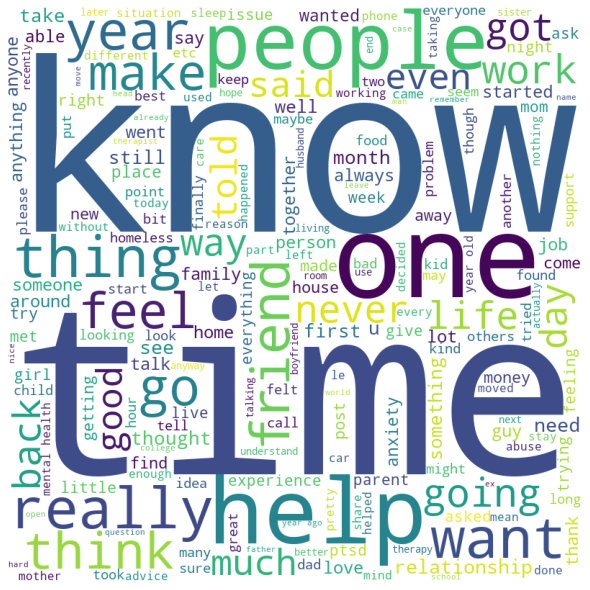

In [77]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [78]:
ys = ' '.join(stress_processed_text)

In [79]:
ys_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(ys)

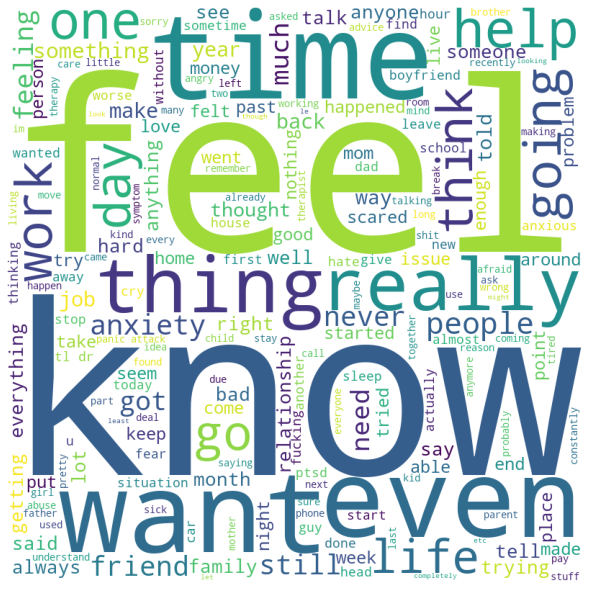

In [80]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(ys_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Word2Vec

In [81]:
import gensim


In [82]:
wnl = WordNetLemmatizer()
def wv_preprocessing(text):
    
    #step 2: tokenize
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    tokenized_doc = nltk.regexp_tokenize(text, pattern)
    
    
    #step x: lower all cases and tokenize
    low_tokenized_doc = [word.lower() for word in tokenized_doc]
    
    
    #step 4: stop words
    custom_stop_words = ['r', 'url']
    stopwords_list = stopwords.words('english') + custom_stop_words
    stop_tokenized_doc = [word for word in low_tokenized_doc if word not in stopwords_list]
    
    #step 5: lem
    tokens = [wnl.lemmatize(word) for word in stop_tokenized_doc]
    
    return tokens

In [83]:
wv_list_to_proc = df['text'].tolist()
wv_text_list = []

for each_row in wv_list_to_proc:
    wv_text_list.append(wv_preprocessing(each_row))

In [84]:
wv_text_list

[['said',
  'felt',
  'way',
  'suggeted',
  'go',
  'rest',
  'trigger',
  'ahead',
  'youi',
  'hypocondriac',
  'like',
  'decide',
  'look',
  'feeling',
  'doom',
  'hope',
  'maybe',
  'getting',
  'sucked',
  'rabbit',
  'hole',
  'ludicrous',
  'conspiracy',
  'stupid',
  'psychic',
  'test',
  'new',
  'age',
  'b',
  'something',
  'could',
  'even',
  'laugh',
  'road',
  'ended',
  'reading',
  'sense',
  'doom',
  'indicative',
  'various',
  'health',
  'ailment',
  'one',
  'prone',
  'top',
  'doom',
  'gloom',
  "f'n",
  'worried',
  'heart',
  'happen',
  'physical',
  'hour'],
 ['hey',
  'assistance',
  'sure',
  'right',
  'place',
  'post',
  'go',
  "i'm",
  'currently',
  'student',
  'intern',
  'sandia',
  'national',
  'lab',
  'working',
  'survey',
  'help',
  'improve',
  'marketing',
  'outreach',
  'effort',
  'many',
  'school',
  'recruit',
  'around',
  'country',
  "we're",
  'looking',
  'current',
  'undergrad',
  'grad',
  'stem',
  'student',
  's

In [85]:
w2v = gensim.models.Word2Vec(
    window = 10,
    min_count = 1,
    workers = 4
)

In [86]:
w2v.build_vocab(wv_text_list, progress_per=1000)

In [88]:
w2v.train(wv_text_list, total_examples = w2v.corpus_count, epochs=w2v.epochs)

(516336, 555340)

In [89]:
#should save model here
#model.save(saving location)

In [90]:
w2v.wv.most_similar("ptsd")

[('getting', 0.9999693632125854),
 ('therapy', 0.9999692440032959),
 ('symptom', 0.9999681711196899),
 ('past', 0.9999680519104004),
 ('well', 0.9999669790267944),
 ('around', 0.9999667406082153),
 ('fear', 0.9999666810035706),
 ('ever', 0.9999666213989258),
 ('pretty', 0.9999660849571228),
 ('abuse', 0.9999659061431885)]

In [91]:
from gensim.models import Word2Vec
my_model = Word2Vec(wv_text_list, min_count = 2)

In [92]:
print(my_model)

Word2Vec(vocab=5549, size=100, alpha=0.025)


In [93]:
words = list(my_model.wv.vocab)

In [94]:
words

['said',
 'felt',
 'way',
 'go',
 'rest',
 'trigger',
 'ahead',
 'like',
 'decide',
 'look',
 'feeling',
 'doom',
 'hope',
 'maybe',
 'getting',
 'sucked',
 'rabbit',
 'hole',
 'stupid',
 'psychic',
 'test',
 'new',
 'age',
 'b',
 'something',
 'could',
 'even',
 'laugh',
 'road',
 'ended',
 'reading',
 'sense',
 'various',
 'health',
 'ailment',
 'one',
 'prone',
 'top',
 'worried',
 'heart',
 'happen',
 'physical',
 'hour',
 'hey',
 'assistance',
 'sure',
 'right',
 'place',
 'post',
 "i'm",
 'currently',
 'student',
 'national',
 'lab',
 'working',
 'survey',
 'help',
 'improve',
 'marketing',
 'effort',
 'many',
 'school',
 'around',
 'country',
 "we're",
 'looking',
 'current',
 'undergrad',
 'grad',
 'stem',
 'know',
 'would',
 'greatly',
 'appreciate',
 'take',
 'pas',
 'along',
 'short',
 'thank',
 'everyone',
 'entered',
 'drawing',
 'chance',
 'win',
 'three',
 'amazon',
 'mom',
 'hit',
 'newspaper',
 'shocked',
 'play',
 'hitting',
 'smacking',
 'violence',
 'sort',
 'person

## Vader

In [ ]:
pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
vader = SentimentIntensityAnalyzer()

In [ ]:

for sentence in df['text']:
    vs = vader.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))
 

In [ ]:
for sentence in processed_text:
    vs = vader.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))

In [ ]:
processed_text[10]

## Word2Vec LR

In [95]:
#from kaggle
def document_vector(doc):
    """Create document vectors by averaging word vectors. Remove out-of-vocabulary words."""
    doc = [word for word in doc if word in w2v.wv.vocab]
    return np.mean(w2v[doc], axis=0)

In [110]:
lr = LogisticRegression(C=100)

In [99]:
df['wv_text'] = [document_vector(doc) for doc in wv_text_list]


<ipython-input-95-8cf243fd6e8b>:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  return np.mean(w2v[doc], axis=0)


In [100]:
df.head()

subreddit post_id sentence_range  \
0              ptsd  8601tu       (15, 20)   
1        assistance  8lbrx9         (0, 5)   
2              ptsd  9ch1zh       (15, 20)   
3     relationships  7rorpp        [5, 10]   
4  survivorsofabuse  9p2gbc         [0, 5]   

                                                text     id  label  \
0  He said he had not felt that way before, sugge...  33181      1   
1  Hey there r/assistance, Not sure if this is th...   2606      0   
2  My mom then hit me with the newspaper and it s...  38816      1   
3  until i met my new boyfriend, he is amazing, h...    239      1   
4  October is Domestic Violence Awareness Month a...   1421      1   

   confidence  social_timestamp  social_karma  syntax_ari  ...  \
0         0.8        1521614353             5    1.806818  ...   
1         1.0        1527009817             4    9.429737  ...   
2         0.8        1535935605             2    7.769821  ...   
3         0.6        1516429555             0    2.667798  ...   
4         0.8        1539809005            24    7.554238  ...   

   lex_dal_min_imagery  lex_dal_avg_activation  lex_dal_avg_imagery  \
0                  1.0                 1.77000              1.52211   
1                  1.0                 1.69586              1.62045   
2                  1.0                 1.83088              1.58108   
3                  1.0                 1.75356              1.52114   
4                  1.0                 1.77644              1.64872   

   lex_dal_avg_pleasantness  social_upvote_ratio  social_num_comments  \
0                   1.89556                 0.86                    1   
1                   1.88919                 0.65                    2   
2                   1.85828                 0.67                    0   
3                   1.98848                 0.50                    5   
4                   1.81456                 1.00                    1   

   syntax_fk_grade  sentiment  \
0         3.253573  -0.002742   
1         8.828316   0.292857   
2         7.841667   0.011894   
3         4.104027   0.141671   
4         7.910952  -0.204167   

                                      processed_text  \
0  said felt way suggeted go rest trigger ahead h...   
1  hey assistance sure right place post go i'm cu...   
2  mom hit newspaper shocked would know like play...   
3  met new boyfriend amazing kind sweet good stud...   
4  october domestic violence awareness month dome...   

                                             wv_text  
0  [0.22949797, 0.015812516, 0.15682435, 0.248286...  
1  [0.26252076, 0.01452662, 0.18092579, 0.2860418...  
2  [0.3145237, 0.019612892, 0.21636894, 0.3415492...  
3  [0.3557513, 0.029749125, 0.2405214, 0.3816778,...  
4  [0.22022027, 0.01373544, 0.15020871, 0.2399579...  

[5 rows x 118 columns]

In [104]:
wv_x_train = list(df['wv_text'])
y_train = df['label']

In [111]:
lr.fit(wv_x_train, y_train)

LogisticRegression(C=100)

In [112]:
lr.score(wv_x_train, y_train)

0.6606765327695561

In [130]:
from sklearn import svm

In [131]:

svm = svm.SVC()

In [132]:
svm.fit(X_train, y_train)

SVC()

In [123]:
svm.score(X_train, y_train)

0.966878083157153

In [125]:
svm_y_pred = svm.predict(X_test)

In [126]:
svm.score(X_test, y_test)

0.7160839160839161

In [133]:

print(classification_report(y_test, svm_y_pred))

              precision    recall  f1-score   support

           0       0.72      0.67      0.70       346
           1       0.71      0.76      0.73       369

    accuracy                           0.72       715
   macro avg       0.72      0.71      0.71       715
weighted avg       0.72      0.72      0.72       715

